In [47]:
# Import libraries
import os
import cv2
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras import Model
from tensorflow.keras.saving import load_model

In [48]:
# Data normalization
normalize = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),
])

In [49]:
IMG_SIZE = (224, 224)
IMG_SHAPE = IMG_SIZE + (3,)

In [50]:
# Set directories
root_dir = os.getcwd()
model_dir = os.path.join(root_dir, "models")
test_dir = os.path.join(root_dir, "test-dataset")

In [51]:
# model = load_model(os.path.join(model_dir, "pretrained_model.keras"))

In [52]:
model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                          include_top=False,
                                          weights='imagenet',
                                          )

In [53]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_4[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[

In [54]:
idx = [3, 15, 23, 32]

In [55]:
outputs = [model.layers[i].output for i in idx]

In [56]:
model = Model(inputs=model.inputs, outputs=outputs)

1/1 [==============================] - 0s 132ms/step


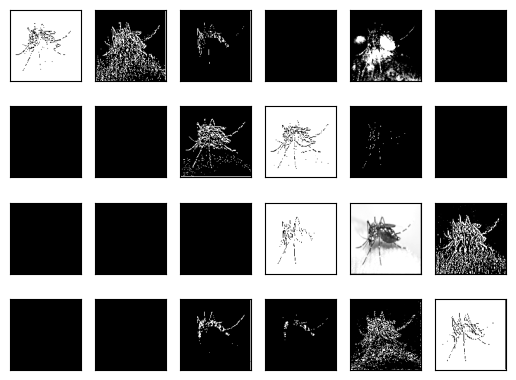

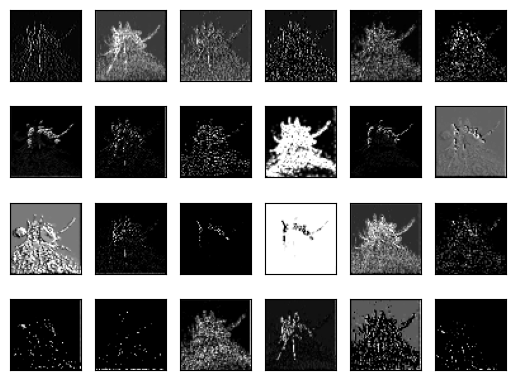

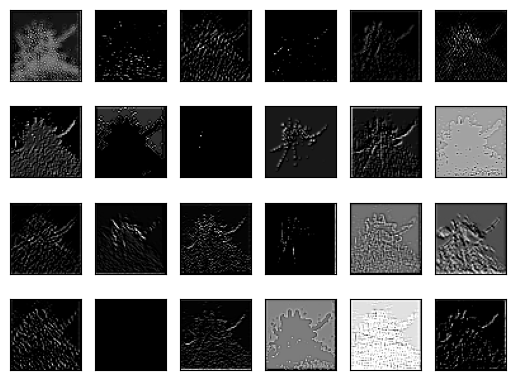

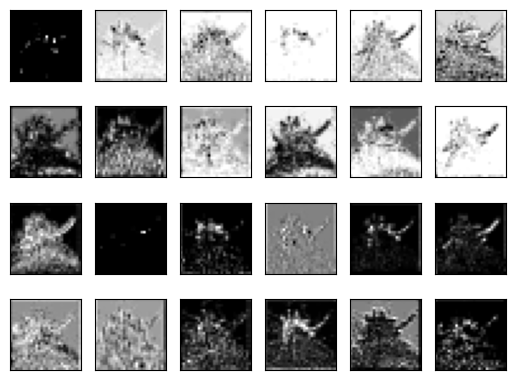

In [57]:
img = cv2.imread(os.path.join(test_dir, "Aedes_aegypti_feeding.jpg"))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = tf.image.resize(img, IMG_SIZE)

yhat = model.predict(np.expand_dims(img, 0))
""" yhat = tf.nn.sigmoid(yhat[0])
yhat = tf.where(yhat < 0.5, 0, 1)
yhat = np.array(yhat) """

for fmap in yhat:
	ix = 1
	for _ in range(4):
		for _ in range(6):
			ax = plt.subplot(4, 6, ix)
			ax.set_xticks([])
			ax.set_yticks([])
			plt.imshow(fmap[0, :, :, ix-1], cmap='gray')
			ix += 1
	plt.show()